In [1]:
import pyart
import cartopy.crs as ccrs
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import operator
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [51]:
radar_i4 = pyart.io.read('/data/cmac/out/cmac_test.nc')
radar_i5 = pyart.io.read('/data/cmac/20170925/i5/sgpxsaprcmacsurI5.c1.20170925.000011.nc')

In [52]:
print('radar_i4.nsweeps=', radar_i4.nsweeps)
print('radar_i5.nsweeps=', radar_i5.nsweeps)
print('radar_i4.ngates=', radar_i4.ngates)
print('radar_i5.ngates=', radar_i5.ngates)
print('radar_i4.nrays=', radar_i4.nrays)
print('radar_i5.nrays=', radar_i5.nrays)
print(radar_i4.fields.keys())


radar_i4.nsweeps= 23
radar_i5.nsweeps= 24
radar_i4.ngates= 501
radar_i5.ngates= 501
radar_i4.nrays= 9200
radar_i5.nrays= 8640
dict_keys(['filtered_corrected_differential_phase', 'gate_id', 'filtered_corrected_specific_diff_phase', 'total_power', 'SNR', 'spectrum_width', 'unfolded_differential_phase', 'rain_rate_A', 'corrected_reflectivity_attenuation', 'cross_correlation_ratio', 'specific_attenuation', 'normalized_coherent_power', 'corrected_velocity', 'velocity', 'specific_differential_phase', 'reflectivity', 'velocity_texture', 'height', 'differential_phase', 'differential_reflectivity', 'sounding_temperature', 'corrected_specific_diff_phase', 'corrected_differential_phase'])


In [53]:
print(radar_i4.fields['gate_id']['notes'])
cat_dict_i4 = {}
for pair_str in radar_i4.fields['gate_id']['notes'].split(','):
    print('##   ', str(pair_str))
    cat_dict_i4.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})
print(cat_dict_i4)
hydro_gatef_i4 = pyart.filters.GateFilter(radar_i4)
hydro_gatef_i5 = pyart.filters.GateFilter(radar_i5)
hydro_gatef_i4.exclude_all()
hydro_gatef_i5.exclude_all()
hydro_gatef_i4.include_equal('gate_id', cat_dict_i4['rain'])
hydro_gatef_i4.include_equal('gate_id', cat_dict_i4['snow'])
hydro_gatef_i4.include_equal('gate_id', cat_dict_i4['melting'])

hydro_gatef_i5.include_equal('gate_id', cat_dict_i5['rain'])
hydro_gatef_i5.include_equal('gate_id', cat_dict_i5['snow'])
hydro_gatef_i5.include_equal('gate_id', cat_dict_i5['melting'])


0:rain,1:multi_trip,2:snow,3:melting,4:no_scatter,5:clutter
##    0:rain
##    1:multi_trip
##    2:snow
##    3:melting
##    4:no_scatter
##    5:clutter
{'rain': 0, 'multi_trip': 1, 'snow': 2, 'melting': 3, 'no_scatter': 4, 'clutter': 5}


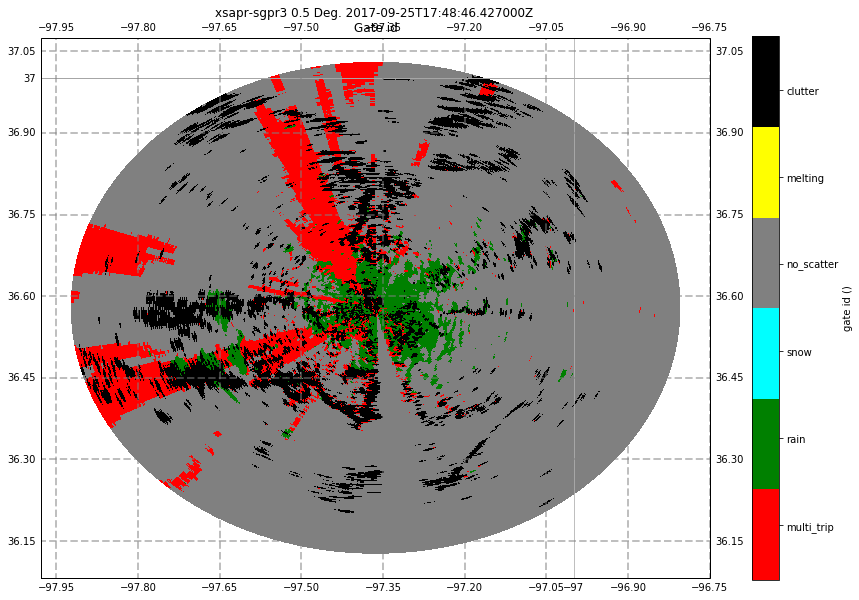

In [6]:
sweep = 0
sorted_cats = sorted(cat_dict_i4.items(), key=operator.itemgetter(1))
cat_colors = {'rain': 'green',
              'multi_trip': 'red',
              'no_scatter': 'gray',
              'snow': 'cyan',
              'melting': 'yellow',
              'clutter': 'black'}
lab_colors = ['red', 'cyan', 'grey', 'green', 'yellow', 'black']
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
cmap = colors.ListedColormap(lab_colors)

display = pyart.graph.RadarMapDisplayCartopy(radar_i4)
fig = plt.figure(figsize=[15, 10])
display.plot_ppi_map('gate_id', sweep=sweep, resolution='50m', cmap=cmap,
                     vmin=0, vmax=5, projection=ccrs.PlateCarree())
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

cbax = plt.gca()
tick_locs = np.linspace(0, len(sorted_cats) - 2, len(sorted_cats)) + 0.5
    
display.cbs[-1].locator = ticker.FixedLocator(tick_locs)
catty_list = [sorted_cats[i][0] for i in range(len(sorted_cats))]
display.cbs[-1].formatter = ticker.FixedFormatter(catty_list)
display.cbs[-1].update_ticks()


##    0:multi_trip
##    1:rain
##    2:snow
##    3:no_scatter
##    4:melting
##    5:clutter
{'multi_trip': 0, 'rain': 1, 'snow': 2, 'no_scatter': 3, 'melting': 4, 'clutter': 5}


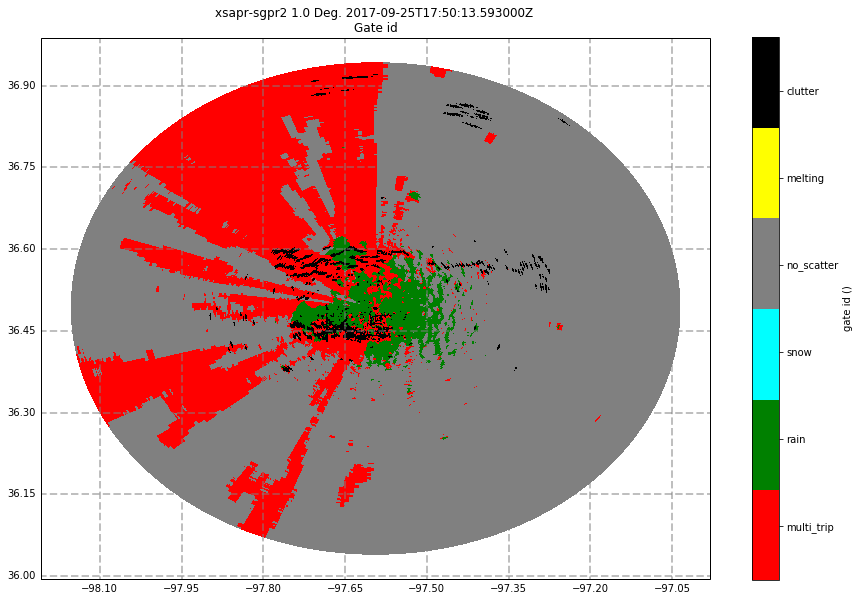

In [18]:
sweep = 1
cat_dict_i5 = {}
for pair_str in radar_i5.fields['gate_id']['notes'].split(','):
    print('##   ', str(pair_str))
    cat_dict_i5.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})
print(cat_dict_i5)
sorted_cats = sorted(cat_dict_i5.items(), key=operator.itemgetter(1))
cat_colors = {'rain': 'green',
              'multi_trip': 'red',
              'no_scatter': 'gray',
              'snow': 'cyan',
              'melting': 'yellow',
              'clutter': 'black'}
lab_colors = ['red', 'cyan', 'grey', 'green', 'yellow', 'black']
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
cmap = colors.ListedColormap(lab_colors)
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

display.plot_ppi_map('gate_id', sweep=sweep, resolution='50m', cmap=cmap,
                     vmin=0, vmax=5, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100])

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
tick_locs = np.linspace(0, len(sorted_cats) - 2, len(sorted_cats)) + 0.5
    
display.cbs[-1].locator = ticker.FixedLocator(tick_locs)
catty_list = [sorted_cats[i][0] for i in range(len(sorted_cats))]
display.cbs[-1].formatter = ticker.FixedFormatter(catty_list)
display.cbs[-1].update_ticks()
plt.savefig('/Users/scollis/fb_1.png')

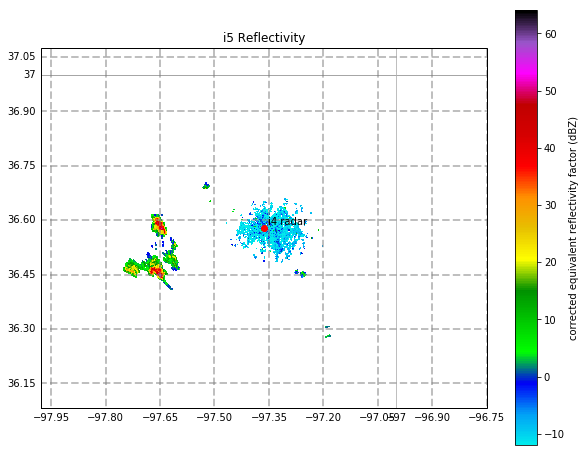

In [62]:
sweep = 1
fig = plt.figure(figsize = [10,8])
min_lat = radar_i5.gate_latitude['data'].min()
max_lat = radar_i5.gate_latitude['data'].max()

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplayCartopy(radar_i4)

#get center of the display for the projection
lat_0 = display.loc[0]
lon_0 = display.loc[1]

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'attenuation_corrected_reflectivity', sweep, colorbar_flag=True,
    title='i5 Reflectivity',
    projection=ccrs.PlateCarree(),
    vmin=-12, vmax=64, resolution='10m',
    cmap = pyart.graph.cm.NWSRef, gatefilter = hydro_gatef_i4)

# Mark the radar
display.plot_point(lon_0, lat_0, label_text='i4 radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

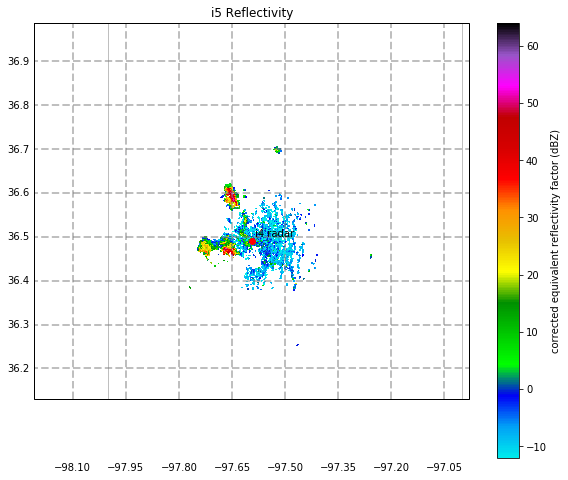

In [70]:
sweep = 1
fig = plt.figure(figsize = [10,8])
min_lat = radar_i4.gate_latitude['data'].min()
max_lat = radar_i4.gate_latitude['data'].max()

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

#get center of the display for the projection
lat_0 = display.loc[0]
lon_0 = display.loc[1]

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = ccrs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'attenuation_corrected_reflectivity', sweep, colorbar_flag=True,
    title='i5 Reflectivity',
    projection=projection,
    vmin=-12, vmax=64, resolution='10m',
    cmap = pyart.graph.cm.NWSRef, gatefilter = hydro_gatef_i5)

# Mark the radar
display.plot_point(lon_0, lat_0, label_text='i4 radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

In [77]:
display.plot_ppi_map?

##    0:multi_trip
##    1:rain
##    2:snow
##    3:no_scatter
##    4:melting
##    5:clutter
{'multi_trip': 0, 'rain': 1, 'snow': 2, 'no_scatter': 3, 'melting': 4, 'clutter': 5}


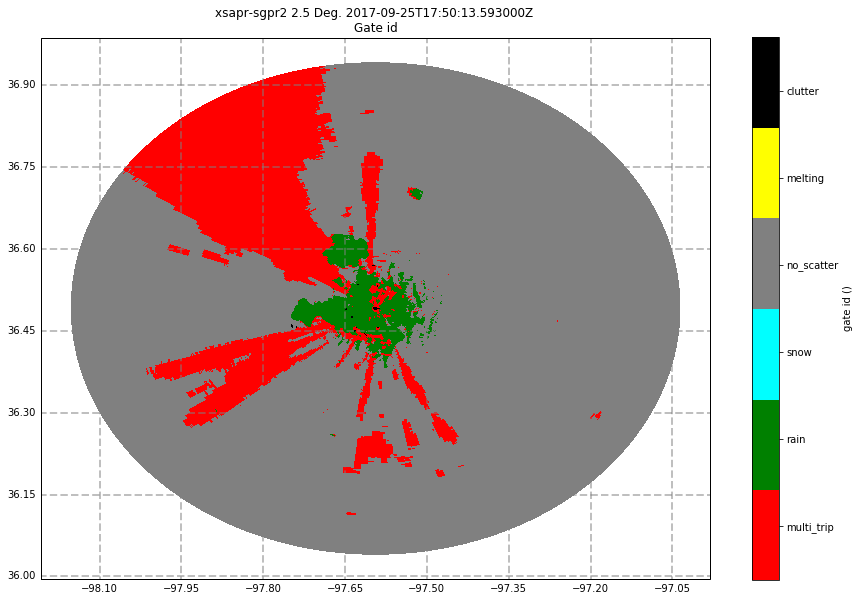

In [8]:
sweep = 3
cat_dict_i5 = {}
for pair_str in radar_i5.fields['gate_id']['notes'].split(','):
    print('##   ', str(pair_str))
    cat_dict_i5.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})
print(cat_dict_i5)
sorted_cats = sorted(cat_dict_i5.items(), key=operator.itemgetter(1))
cat_colors = {'rain': 'green',
              'multi_trip': 'red',
              'no_scatter': 'gray',
              'snow': 'cyan',
              'melting': 'yellow',
              'clutter': 'black'}
lab_colors = ['red', 'cyan', 'grey', 'green', 'yellow', 'black']
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
cmap = colors.ListedColormap(lab_colors)
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

display.plot_ppi_map('gate_id', sweep=sweep, resolution='50m', cmap=cmap,
                     vmin=0, vmax=5, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100])

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
tick_locs = np.linspace(0, len(sorted_cats) - 2, len(sorted_cats)) + 0.5
    
display.cbs[-1].locator = ticker.FixedLocator(tick_locs)
catty_list = [sorted_cats[i][0] for i in range(len(sorted_cats))]
display.cbs[-1].formatter = ticker.FixedFormatter(catty_list)
display.cbs[-1].update_ticks()
plt.savefig('/Users/scollis/fb_1.png')

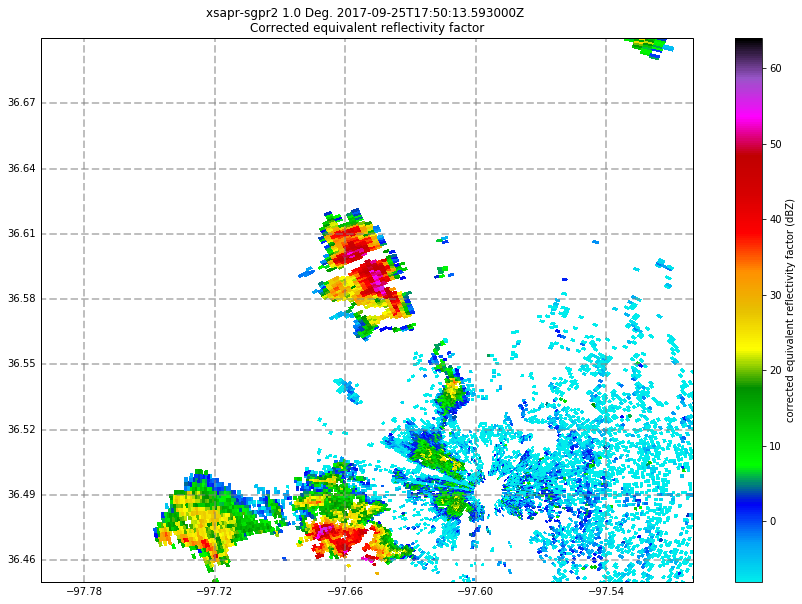

In [31]:
sweep = 1
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

display.plot_ppi_map('attenuation_corrected_reflectivity', sweep=sweep, resolution='50m', cmap=pyart.graph.cm.NWSRef,
                     vmin=-8, vmax=64, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100],
                    gatefilter = hydro_gatef_i5,
                    max_lat=36.7, max_lon=-97.5, min_lon=-97.8, min_lat=36.45)

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
plt.savefig('/Users/scollis/Documents/SBU_radar_meeting/clean_i5.png')

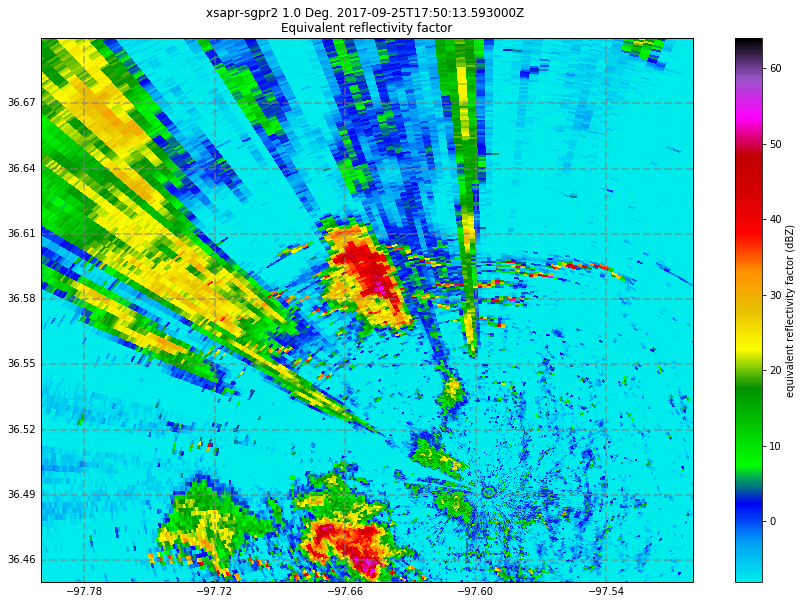

In [32]:
sweep = 1
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

display.plot_ppi_map('reflectivity', sweep=sweep, resolution='50m', cmap=pyart.graph.cm.NWSRef,
                     vmin=-8, vmax=64, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100],
                    gatefilter = None,
                    max_lat=36.7, max_lon=-97.5, min_lon=-97.8, min_lat=36.45)

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
plt.savefig('/Users/scollis/Documents/SBU_radar_meeting/raw_i5.png')

##    0:multi_trip
##    1:rain
##    2:snow
##    3:no_scatter
##    4:melting
##    5:clutter
{'multi_trip': 0, 'rain': 1, 'snow': 2, 'no_scatter': 3, 'melting': 4, 'clutter': 5}


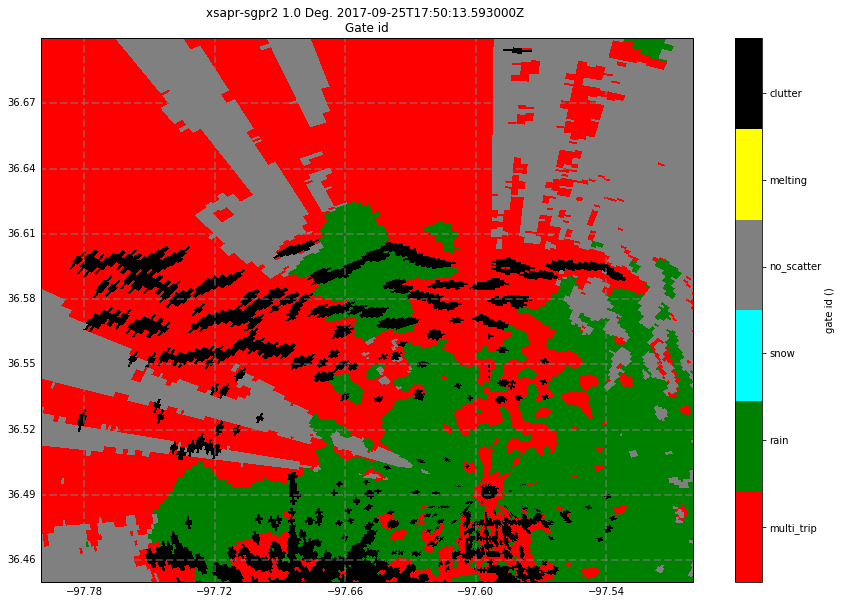

In [33]:
sweep = 1
cat_dict_i5 = {}
for pair_str in radar_i5.fields['gate_id']['notes'].split(','):
    print('##   ', str(pair_str))
    cat_dict_i5.update({pair_str.split(':')[1]:int(pair_str.split(':')[0])})
print(cat_dict_i5)
sorted_cats = sorted(cat_dict_i5.items(), key=operator.itemgetter(1))
cat_colors = {'rain': 'green',
              'multi_trip': 'red',
              'no_scatter': 'gray',
              'snow': 'cyan',
              'melting': 'yellow',
              'clutter': 'black'}
lab_colors = ['red', 'cyan', 'grey', 'green', 'yellow', 'black']
lab_colors = [cat_colors[kitty[0]] for kitty in sorted_cats]
cmap = colors.ListedColormap(lab_colors)
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i5)

display.plot_ppi_map('gate_id', sweep=sweep, resolution='50m', cmap=cmap,
                     vmin=0, vmax=5, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100],
                     max_lat=36.7, max_lon=-97.5, min_lon=-97.8, min_lat=36.45)

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
tick_locs = np.linspace(0, len(sorted_cats) - 2, len(sorted_cats)) + 0.5
    
display.cbs[-1].locator = ticker.FixedLocator(tick_locs)
catty_list = [sorted_cats[i][0] for i in range(len(sorted_cats))]
display.cbs[-1].formatter = ticker.FixedFormatter(catty_list)
display.cbs[-1].update_ticks()
plt.savefig('/Users/scollis/Documents/SBU_radar_meeting/gate_id_zoomi5.png')

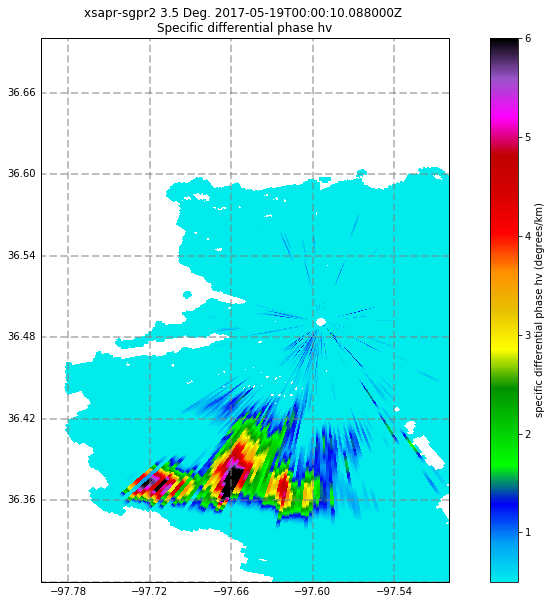

In [57]:
sweep = 3
fig = plt.figure(figsize=[15, 10])

display = pyart.graph.RadarMapDisplayCartopy(radar_i4)

display.plot_ppi_map('filtered_corrected_specific_diff_phase', sweep=sweep, resolution='50m', cmap=pyart.graph.cm.NWSRef,
                     vmin=0.5, vmax=6, projection=ccrs.PlateCarree(), lat_lines =[47], lon_lines=[-100],
                    gatefilter = hydro_gatef_i4,max_lat=36.7, max_lon=-97.5, min_lon=-97.8, min_lat=36.3 )

display.ax.set_aspect(1)

gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

cbax = plt.gca()
plt.savefig('/Users/scollis/Documents/SBU_radar_meeting/clean_i5.png')

In [ ]:
dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'differential_phase', 'xsapr_clutter', 'sounding_temperature', 'height', 'SNR', 'velocity_texture', 'gate_id', 'corrected_velocity', 'unfolded_differential_phase', 'corrected_differential_phase', 'filtered_corrected_differential_phase', 'corrected_specific_diff_phase', 'filtered_corrected_specific_diff_phase', 'specific_attenuation', 'attenuation_corrected_reflectivity', 'rain_rate_A'])